# Ensemble de sous-modèles spécialisés

* Après avoir séparé le dataset d'entrainement en fonction du nombre et de la position des nan (grâce au contenu de la colonne filtre construit dans []())
* Nous déterminerons le meilleur modèle pour chaque subdivision du dataset (en séparant chaque subdivision en train/test)
* Puis, nous déterminerons le MAE du dataset validation en inférant pour chaque ligne le bon sous-modele (en fonction de la position et du nombre de NaN)

> Dans les titres de partie ci-desous :
* NaN en position 1 --> p1q0 == NaN
* NaN en position 2 --> p2q0 == NaN
* NaN en position 3 --> p3q0 == NaN
* NaN en position 4 --> t0s1 == NaN
* NaN en position 5 --> t0s2 == NaN
* NaN en position 6 --> t0s3 == NaN

In [ ]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py

#libraries
import feature_engineering
import visualization
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import sklearn
import missingno as msno
from pandas.plotting import scatter_matrix

--2023-07-04 11:04:16--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-07-04 11:04:16 (51.0 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

--2023-07-04 11:04:16--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443.

In [ ]:
## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression

--2023-07-04 11:04:18--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-07-04 11:04:18 (55.7 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-07-04 11:04:18--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected

In [ ]:
#dataset
!pip install GitPython
!git clone https://github.com/hrandrIAga/ChallengeData_SNCFTransilien.git
df = pd.read_csv('/content/ChallengeData_SNCFTransilien/NET4550_Haga_Pierre_Adam/Datasets/Datasets_new/train_t0sj.csv')
dataframe_validation = pd.read_csv('/content/ChallengeData_SNCFTransilien/NET4550_Haga_Pierre_Adam/Datasets/Datasets_new/validation_t0sj.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
Cloning into 'ML_for_networks'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 249 (delta 97), reused 161 (delta 20), pack-reused 0
Receiving objects: 100% (249/249), 12.11 MiB | 3.93 MiB/s, done.
Resolving deltas: 100% (97/97), done.


## 1. Absence de NAN : 000000

In [ ]:
#Obtention de la subdivision du datatset
df_oooooo = df[df['filtre'] == 'oooooo']

In [ ]:
df_oooooo.shape

(14264, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oooooo_lr=[
 #'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 #'Day_Wednesday',
 'Train_1',
 'Train_2',
 #'Train_3',
 'Train_4',
 #'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 #'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 #'Train_14',
 #'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 #'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 #'Train_31',
 'Train_32',
 #'Train_33',
 'Train_34',
 #'Train_35',
 'Train_36',
#'Train_37',
 'Train_38',
 #'Train_39',
 #'Train_40',
 'Train_41',
#'Train_42',
 'Train_43',
 'Train_44',
 #'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 #'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
#'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 #'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 #'hour_int',
 't0s1',
 't0s2',
 't0s3',]

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oooooo_train, df_oooooo_test = train_test_split(df_oooooo, test_size=0.2, random_state=42)
X_train = df_oooooo_train[cols_oooooo_lr]
y_train = df_oooooo_train['p0q0']
X_test = df_oooooo_test[cols_oooooo_lr]
y_test = df_oooooo_test['p0q0']

In [ ]:
model_oooooo_lr = AndreaLinearRegression()
model_oooooo_lr.fit(X_train, y_train, column_names=cols_oooooo_lr)
model_oooooo_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4737.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:04:42   Log-Likelihood:                 25131.
No. Observations:               11411   AIC:                        -5.013e+04
Df Residuals:                   11344   BIC:                        -4.964e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0405      0.002     22.313   

In [ ]:
from sklearn.linear_model import LinearRegression
model_oooooo_lr = LinearRegression()
model_oooooo_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_oooooo_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.018498890170458155

### b/ Random Forest

In [ ]:
cols_oooooo_rf=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',]

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oooooo_train, df_oooooo_test = train_test_split(df_oooooo, test_size=0.2, random_state=42)
X_train = df_oooooo_train[cols_oooooo_rf]
y_train = df_oooooo_train['p0q0']
X_test = df_oooooo_test[cols_oooooo_rf]
y_test = df_oooooo_test['p0q0']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_estimators': [500],
    'max_depth': [25,28,31],
    'min_samples_split': [5],
    'min_samples_leaf': [6]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=42)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 28}
MAE avec les meilleurs hyperparamètres: 0.013540706877559474


### c/ réseau de neurones

NB : nous n'avons pas standardisé les données car l'ordre de grandeur des variables est le même
* taux d'occupation : entre 0 et 1
* one hot encoding : entre 0 et 1
* heure = heure/24 --> entre 0 et 1

In [ ]:
cols_oooooo_nn=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oooooo_train, df_oooooo_test = train_test_split(df_oooooo, test_size=0.2, random_state=42)
X_train = df_oooooo_train[cols_oooooo_nn]
y_train = df_oooooo_train['p0q0']
X_test = df_oooooo_test[cols_oooooo_nn]
y_test = df_oooooo_test['p0q0']

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Définition de l'architecture du modèle de réseau de neurones
model_oooooo_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilation du modèle
model_oooooo_nn.compile(optimizer='adam', loss='mean_absolute_error')

# Entraînement du modèle
history = model_oooooo_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
357/357 [==============================] - 8s 5ms/step - loss: 0.0530 - val_loss: 0.0282
Epoch 2/100
357/357 [==============================] - 1s 4ms/step - loss: 0.0240 - val_loss: 0.0199
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0207 - val_loss: 0.0187
Epoch 4/100
357/357 [==============================] - 1s 4ms/step - loss: 0.0202 - val_loss: 0.0176
Epoch 5/100
357/357 [==============================] - 2s 6ms/step - loss: 0.0185 - val_loss: 0.0178
Epoch 6/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0171 - val_loss: 0.0165
Epoch 7/100
357/357 [==============================] - 1s 4ms/step - loss: 0.0168 - val_loss: 0.0153
Epoch 8/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0166 - val_loss: 0.0159
Epoch 9/100
357/357 [==============================] - 1s 4ms/step - loss: 0.0156 - val_loss: 0.0157
Epoch 10/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0152 - val_lo

In [ ]:
# Évaluation du modèle sur l'ensemble de test
y_pred = model_oooooo_nn.predict(X_test)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

90/90 [==============================] - 0s 2ms/step
MAE: 0.011568200211806169


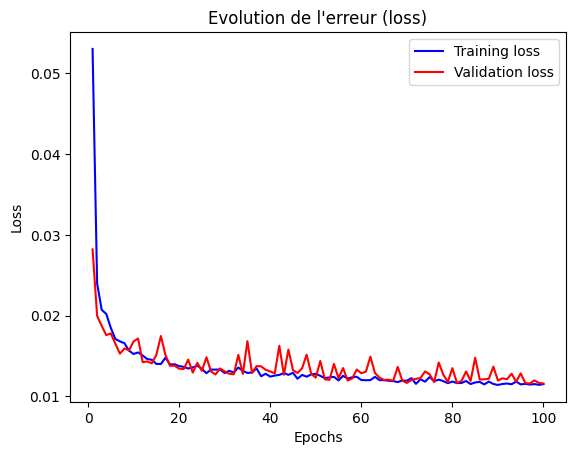

In [ ]:

import matplotlib.pyplot as plt

# Visualisation de l'évolution de l'erreur (loss) pour l'ensemble d'entraînement et l'ensemble de test
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Evolution de l\'erreur (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### d/ On retient le réseau de neurones

In [ ]:
cols_oooooo = cols_oooooo_nn
model_oooooo = model_oooooo_nn

## 2. NaN en position 6 : 00000X

In [ ]:
#Obtention de la subdivision du datatset
df_ooooox = df[df['filtre'] == 'ooooox']
df_ooooox.shape

(1904, 125)

### a/ Linear Regression

In [ ]:
cols_ooooox_lr=[
 #'Day_Friday',
 #'Day_Monday',
 #'Day_Thursday',
 #'Day_Tuesday',
 #'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
# 'Train_4',
 #'Train_5',
 #'Train_6',
 'Train_7',
 'Train_8',
 #'Train_9',
 #'Train_10',
 #'Train_11',
 'Train_12',
 #'Train_13',
 #'Train_14',
 #'Train_15',
 #'Train_16',
 'Train_17',
 'Train_18',
 #'Train_19',
 #'Train_20',
 #'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
#'Train_26',
# 'Train_27',
 #'Train_28',
 'Train_29',
 'Train_30',
 #'Train_31',
 #'Train_32',
 #'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 #'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 #'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 #'Train_53',
 'Train_54',
 #'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 #'Station_AL',
 'Station_AM',
 'Station_AN',
 #'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
# 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 #'hour_int',
 't0s1',
 't0s2']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooooox_train, df_ooooox_test = train_test_split(df_ooooox, test_size=0.2, random_state=42)
X_train = df_ooooox_train[cols_ooooox_lr]
y_train = df_ooooox_train['p0q0']
X_test = df_ooooox_test[cols_ooooox_lr]
y_test = df_ooooox_test['p0q0']

In [ ]:
model_ooooox_lr = AndreaLinearRegression()
model_ooooox_lr.fit(X_train, y_train, column_names=cols_ooooox_lr)
model_ooooox_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     4314.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:16:32   Log-Likelihood:                 4614.1
No. Observations:                1523   AIC:                            -9178.
Df Residuals:                    1498   BIC:                            -9045.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0054      0.001      5.828      0.0

In [ ]:
model_ooooox_lr = LinearRegression()
model_ooooox_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_ooooox_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.006768879949094369

### b/ Random Forest

In [ ]:
cols_ooooox_rf=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooooox_train, df_ooooox_test = train_test_split(df_ooooox, test_size=0.2, random_state=42)
X_train = df_ooooox_train[cols_ooooox_rf]
y_train = df_ooooox_train['p0q0']
X_test = df_ooooox_test[cols_ooooox_rf]
y_test = df_ooooox_test['p0q0']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_estimators': [500],
    'max_depth': [12, 14 , 16, 18],
    'min_samples_split': [5],
    'min_samples_leaf': [6]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=42)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 16}
MAE avec les meilleurs hyperparamètres: 0.007988182558632161


### On retient la regression linéaire

In [ ]:
cols_ooooox = cols_ooooox_lr
model_ooooox = model_ooooox_lr

## 3. NaN en positions [5,6] : 0000XX

In [ ]:
#Obtention de la subdivision du datatset
df_ooooxx = df[df['filtre'] == 'ooooxx']
df_ooooxx.shape

(1809, 125)

### a. Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_ooooxx_lr=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 #'Train_4',
 #'Train_5',
 'Train_6',
 'Train_7',
 #'Train_8',
 'Train_9',
 #'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 #'Train_14',
 #'Train_15',
 #'Train_16',
 'Train_17',
 #'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 #'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
#'Train_37',
 #'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AO',
 'Station_AP',
# 'Station_AQ',
#'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 #'Station_BC',
 #'Station_BD',
 #'Station_BE',
 #'Station_BF',
 #'Station_BG',
 #'Station_BH',
 #'Station_BI',
 #'Station_BJ',
 #'hour_int',
 't0s1']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooooxx_train, df_ooooxx_test = train_test_split(df_ooooxx, test_size=0.2, random_state=42)
X_train = df_ooooxx_train[cols_ooooxx_lr]
y_train = df_ooooxx_train['p0q0']
X_test = df_ooooxx_test[cols_ooooxx_lr]
y_test = df_ooooxx_test['p0q0']

In [ ]:
model_ooooxx_lr = AndreaLinearRegression()
model_ooooxx_lr.fit(X_train, y_train, column_names=cols_ooooxx_lr)
model_ooooxx_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2990.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:17:11   Log-Likelihood:                 4951.7
No. Observations:                1447   AIC:                            -9831.
Df Residuals:                    1411   BIC:                            -9641.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0200      0.001     23.792

In [ ]:
model_ooooxx_lr = LinearRegression()
model_ooooxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_ooooxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.005434640283742663

### b/ Random Forest

In [ ]:
cols_ooooxx_rf=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',]

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooooxx_train, df_ooooxx_test = train_test_split(df_ooooxx, test_size=0.2, random_state=42)
X_train = df_ooooxx_train[cols_ooooxx_rf]
y_train = df_ooooxx_train['p0q0']
X_test = df_ooooxx_test[cols_ooooxx_rf]
y_test = df_ooooxx_test['p0q0']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_estimators': [500],
    'max_depth': [12,14,16,18],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,4,6]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=42)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 14}
MAE avec les meilleurs hyperparamètres: 0.00648827321113017


### ON retiens le modele de régression linéaire
### On remarque que lorsque la base de données d'entrainement contient moins de 2000 exemples, la regression linéaire est plus performante que le random forest.
C'est pourquoi nous n'utiliserons plus que des modèles de regression linéaire pour les prochaines subdivisions

In [ ]:
cols_ooooxx = cols_ooooxx_lr
model_ooooxx = model_ooooxx_lr

## 4. NaN en positions [4,5,6] : 000XXX

In [ ]:
#Obtention de la subdivision du datatset
df_oooxxx = df[df['filtre'] == 'oooxxx']
df_oooxxx.shape

(1960, 125)

### a/ linear regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oooxxx_lr=[
 #'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
# 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 #'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 'p0q1',
 'p0q2',
 'p0q3']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oooxxx_train, df_oooxxx_test = train_test_split(df_oooxxx, test_size=0.2, random_state=42)
X_train = df_oooxxx_train[cols_oooxxx_lr]
y_train = df_oooxxx_train['p0q0']
X_test = df_oooxxx_test[cols_oooxxx_lr]
y_test = df_oooxxx_test['p0q0']

In [ ]:
from sklearn.linear_model import LinearRegression
model_oooxxx_lr = LinearRegression()
model_oooxxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_oooxxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.01091054628333267

### Random Forest

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oooxxx_rf=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 'p0q1',
 'p0q2',
 'p0q3']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oooooo_train, df_oooooo_test = train_test_split(df_oooxxx, test_size=0.2, random_state=42)
X_train = df_oooxxx_train[cols_oooxxx_rf]
y_train = df_oooxxx_train['p0q0']
X_test = df_oooxxx_test[cols_oooxxx_rf]
y_test = df_oooxxx_test['p0q0']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_estimators': [500],
    'max_depth': [25,28,31],
    'min_samples_split': [5],
    'min_samples_leaf': [6]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=42)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 28}
MAE avec les meilleurs hyperparamètres: 0.010915524388332855


In [ ]:
cols_oooxxx = cols_oooxxx_lr
model_oooxxx = model_oooxxx_lr

## 5. NaN en positions [3] : 00X000

In [ ]:
#Obtention de la subdivision du datatset
df_ooxooo = df[df['filtre'] == 'ooxooo']
df_ooxooo.shape

(1032, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_ooxooo_lr=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 #'Train_4',
 #'Train_5',
 'Train_6',
 #'Train_7',
 #'Train_8',
 #'Train_9',
 #'Train_10',
 #'Train_11',
 'Train_12',
 #'Train_13',
 #'Train_14',
 #'Train_15',
#'Train_16',
# 'Train_17',
 #'Train_18',
 #'Train_19',
 #'Train_20',
 'Train_21',
 #'Train_22',
 #'Train_23',
 #'Train_24',
 #'Train_25',
#'Train_26',
 #'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 #'Train_31',
 #'Train_32',
# 'Train_33',
 #'Train_34',
 #'Train_35',
 #'Train_36',
#'Train_37',
 #'Train_38',
 #'Train_39',
 #'Train_40',
 'Train_41',
#'Train_42',
# 'Train_43',
# 'Train_44',
#'Train_45',
 'Train_46',
 'Train_47',
# 'Train_48',
 'Train_49',
 #'Train_50',
 #'Train_51',
 #'Train_52',
 #'Train_53',
 #'Train_54',
 #'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 #'Station_AJ',
 #'Station_AK',
# 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 #'Station_AZ',
 #'Station_BA',
# 'Station_BB',
 #'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 #'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',
 #'p0q1',
 'p0q2']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooxooo_train, df_ooxooo_test = train_test_split(df_ooxooo, test_size=0.2, random_state=42)
X_train = df_ooxooo_train[cols_ooxooo_lr]
y_train = df_ooxooo_train['p0q0']
X_test = df_ooxooo_test[cols_ooxooo_lr]
y_test = df_ooxooo_test['p0q0']

In [ ]:
model_ooxooo_lr = AndreaLinearRegression()
model_ooxooo_lr.fit(X_train, y_train, column_names=cols_ooxooo_lr)
model_ooxooo_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1132.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:55   Log-Likelihood:                 2460.5
No. Observations:                 825   AIC:                            -4863.
Df Residuals:                     796   BIC:                            -4726.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.5139      0.066    -22.958

In [ ]:
model_ooxooo_lr = LinearRegression()
model_ooxooo_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_ooxooo_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.007860649956597222

In [ ]:
cols_ooxooo = cols_ooxooo_lr
model_ooxooo = model_ooxooo_lr

## 6. NaN en positions [3,6] : 00X00X

In [ ]:
#Obtention de la subdivision du datatset
df_ooxoox = df[df['filtre'] == 'ooxoox']
df_ooxoox.shape

(182, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_ooxoox_lr=[
# 'Day_Friday',
 #'Day_Monday',
 #'Day_Thursday',
 #'Day_Tuesday',
 #'Day_Wednesday',
 'Train_1',
 'Train_2',
# 'Train_3',
# 'Train_4',
 'Train_5',
 'Train_6',
 #'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
# 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
# 'hour_int',
 't0s1',
 't0s2',
 'p0q1',
 #'p0q2'
                 ]

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooxoox_train, df_ooxoox_test = train_test_split(df_ooxoox, test_size=0.2, random_state=42)
X_train = df_ooxoox_train[cols_ooxoox_lr]
y_train = df_ooxoox_train['p0q0']
X_test = df_ooxoox_test[cols_ooxoox_lr]
y_test = df_ooxoox_test['p0q0']

In [ ]:
model_ooxoox_lr = AndreaLinearRegression()
model_ooxoox_lr.fit(X_train, y_train, column_names=cols_ooxoox_lr)
model_ooxoox_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3214.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.40e-145
Time:                        11:18:55   Log-Likelihood:                 528.67
No. Observations:                 145   AIC:                            -1043.
Df Residuals:                     138   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.005      2.439      0.0

In [ ]:
model_ooxoox_lr = LinearRegression()
model_ooxoox_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_ooxoox_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.004896705304468604

In [ ]:
cols_ooxoox = cols_ooxoox_lr
model_ooxoox = model_ooxoox_lr

## 7. NaN en positions [3,5,6] : 00X0XX

In [ ]:
#Obtention de la subdivision du datatset
df_ooxoxx = df[df['filtre'] == 'ooxoxx']
df_ooxoxx.shape

(231, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_ooxoxx_lr=[
 #'Day_Friday',
 #'Day_Monday',
 'Day_Thursday',
 #'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 #'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 #'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 #'Train_10',
 'Train_11',
 'Train_12',
 #'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 #'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 #'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 #'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
#'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
#'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 #'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 #'Train_55',
 'Station_AA',
 'Station_AB',
 #'Station_AC',
 'Station_AD',
# 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 #'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 #'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 #'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 #'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 #'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 'p0q1',
 'p0q2']

In [ ]:
df_ooxoxx_train, df_ooxoxx_test = train_test_split(df_ooxoxx, test_size=0.2, random_state=42)
X_train = df_ooxoxx_train[cols_ooxoxx_lr]
y_train = df_ooxoxx_train['p0q0']
X_test = df_ooxoxx_test[cols_ooxoxx_lr]
y_test = df_ooxoxx_test['p0q0']

In [ ]:
model_ooxoxx_lr = LinearRegression()
model_ooxoxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_ooxoxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.006866356382978723

In [ ]:
cols_ooxoxx = cols_ooxoxx_lr
model_ooxoxx = model_ooxoxx_lr

## 8. NaN en positions [3,4,5,6] : 00XXXX

In [ ]:
#Obtention de la subdivision du datatset
df_ooxxxx = df[df['filtre'] == 'ooxxxx']
df_ooxxxx.shape

(184, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_ooxxxx_lr=[
 'Day_Friday',
 'Day_Monday',
 #'Day_Thursday',
 #'Day_Tuesday',
 'Day_Wednesday',
 #'Train_1',
 'Train_2',
 #'Train_3',
 'Train_4',
 'Train_5',
 #'Train_6',
 #'Train_7',
 #'Train_8',
 'Train_9',
 'Train_10',
 #'Train_11',
 #'Train_12',
 #'Train_13',
 'Train_14',
 #'Train_15',
'Train_16',
 #'Train_17',
 'Train_18',
 'Train_19',
 #'Train_20',
 #'Train_21',
 'Train_22',
 'Train_23',
 #'Train_24',
 'Train_25',
#'Train_26',
 'Train_27',
 #'Train_28',
 #'Train_29',
 'Train_30',
 #'Train_31',
 'Train_32',
 #'Train_33',
 'Train_34',
 #'Train_35',
 'Train_36',
#'Train_37',
 #'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
#'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 #'Train_50',
 #'Train_51',
 #'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 #'Station_AA',
 'Station_AB',
 #'Station_AC',
 'Station_AD',
 #'Station_AE',
 'Station_AF',
 'Station_AG',
 #'Station_AH',
 'Station_AI',
 #'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 #'Station_AP',
 #'Station_AQ',
'Station_AR',
 #'Station_AS',
 'Station_AT',
 #'Station_AU',
 #'Station_AV',
 'Station_AW',
# 'Station_AX',
# 'Station_AY',
 'Station_AZ',
# 'Station_BA',
 #'Station_BB',
 #'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 'p0q1',
 'p0q2']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_ooxxxx_train, df_ooxxxx_test = train_test_split(df_ooxxxx, test_size=0.2, random_state=42)
X_train = df_ooxxxx_train[cols_ooxxxx_lr]
y_train = df_ooxxxx_train['p0q0']
X_test = df_ooxxxx_test[cols_ooxxxx_lr]
y_test = df_ooxxxx_test['p0q0']

In [ ]:
model_ooxxxx_lr = LinearRegression()
model_ooxxxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_ooxxxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.007014434533826016

In [ ]:
cols_ooxxxx = cols_ooxxxx_lr
model_ooxxxx = model_ooxxxx_lr

## 9. NaN en positions [2,3] : 0XX000

In [ ]:
#Obtention de la subdivision du datatset
df_oxxooo = df[df['filtre'] == 'oxxooo']
df_oxxooo.shape

(888, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oxxooo_lr=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 #'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 #'Train_19',
 #'Train_20',
 #'Train_21',
 #'Train_22',
 #'Train_23',
 #'Train_24',
 #'Train_25',
#'Train_26',
# 'Train_27',
# 'Train_28',
# 'Train_29',
# 'Train_30',
# 'Train_31',
# 'Train_32',
 #'Train_33',
 #'Train_34',
 #'Train_35',
 #'Train_36',
#'Train_37',
 #'Train_38',
 #'Train_39',
 #'Train_40',
 #'Train_41',
#'Train_42',
# 'Train_43',
# 'Train_44',
#'Train_45',
# 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
# 'Station_AA',
# 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 #'Station_AH',
 'Station_AI',
 #'Station_AJ',
 #'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 #'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 #'Station_BJ',
 'hour_int',
 't0s1',
 #'t0s2',
 #'t0s3',
 'p0q1']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oxxooo_train, df_oxxooo_test = train_test_split(df_oxxooo, test_size=0.2, random_state=42)
X_train = df_oxxooo_train[cols_oxxooo_lr]
y_train = df_oxxooo_train['p0q0']
X_test = df_oxxooo_test[cols_oxxooo_lr]
y_test = df_oxxooo_test['p0q0']

In [ ]:
model_oxxooo_lr = AndreaLinearRegression()
model_oxxooo_lr.fit(X_train, y_train, column_names=cols_oxxooo_lr)
model_oxxooo_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4605.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:25:25   Log-Likelihood:                 2490.1
No. Observations:                 710   AIC:                            -4936.
Df Residuals:                     688   BIC:                            -4836.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0379      0.006      6.428

In [ ]:
model_oxxooo_lr = LinearRegression()
model_oxxooo_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_oxxooo_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.004947468961222788

In [ ]:
cols_oxxooo = cols_oxxooo_lr
model_oxxooo = cols_oxxooo_lr

## 10. NaN en positions [2,3,6] : 0XX00X

In [ ]:
#Obtention de la subdivision du datatset
df_oxxoox = df[df['filtre'] == 'oxxoox']
df_oxxoox.shape

(560, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oxxoox_lr=[
 #'Day_Friday',
 #'Day_Monday',
 #'Day_Thursday',
# 'Day_Tuesday',
# 'Day_Wednesday',
 #'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 #'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 #'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
# 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 #'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 #'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 'p0q1']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oxxoox_train, df_oxxoox_test = train_test_split(df_oxxoox, test_size=0.2, random_state=42)
X_train = df_oxxoox_train[cols_oxxoox_lr]
y_train = df_oxxoox_train['p0q0']
X_test = df_oxxoox_test[cols_oxxoox_lr]
y_test = df_oxxoox_test['p0q0']

In [ ]:
model_oxxoox_lr = AndreaLinearRegression()
model_oxxoox_lr.fit(X_train, y_train, column_names=cols_oxxoox_lr)
model_oxxoox_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7996.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:56   Log-Likelihood:                 1644.1
No. Observations:                 448   AIC:                            -3270.
Df Residuals:                     439   BIC:                            -3233.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0277      0.018     -1.500      0.1

In [ ]:
model_oxxoox_lr = LinearRegression()
model_oxxoox_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_oxxoox_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.004621329760977201

In [ ]:
cols_oxxoox = cols_oxxoox_lr
model_oxxoox = cols_oxxoox_lr

## 11. NaN en positions [2,3,5,6] : 0XX0XX

In [ ]:
#Obtention de la subdivision du datatset
df_oxxoxx = df[df['filtre'] == 'oxxoxx']
df_oxxoxx.shape

(278, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oxxoxx_lr=[
 #'Day_Friday',
 #'Day_Monday',
 #'Day_Thursday',
# 'Day_Tuesday',
 #'Day_Wednesday',
 'Train_1',
 #'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 #'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 #'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 #'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 #'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 #'hour_int',
 't0s1',
 'p0q1']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oxxoxx_train, df_oxxoxx_test = train_test_split(df_oxxoxx, test_size=0.2, random_state=42)
X_train = df_oxxoxx_train[cols_oxxoxx_lr]
y_train = df_oxxoxx_train['p0q0']
X_test = df_oxxoxx_test[cols_oxxoxx_lr]
y_test = df_oxxoxx_test['p0q0']

In [ ]:
model_oxxoxx_lr = AndreaLinearRegression()
model_oxxoxx_lr.fit(X_train, y_train, column_names=cols_oxxoxx_lr)
model_oxxoxx_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5825.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          3.62e-228
Time:                        11:18:56   Log-Likelihood:                 809.50
No. Observations:                 222   AIC:                            -1607.
Df Residuals:                     216   BIC:                            -1587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0148      0.002      6.217      0.0

In [ ]:
model_oxxoxx_lr = LinearRegression()
model_oxxoxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_oxxoxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.004415104203856282

In [ ]:
cols_oxxoxx = cols_oxxoxx_lr
model_oxxoxx = cols_oxxoxx_lr

## 12. NaN en positions [2,3,4,5,6] : 0XXXXX

In [ ]:
#Obtention de la subdivision du datatset
df_oxxxxx = df[df['filtre'] == 'oxxxxx']
df_oxxxxx.shape

(228, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_oxxxxx_lr=[
 #'Day_Friday',
 #'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 #'Day_Wednesday',
 #'Train_1',
 'Train_2',
 #'Train_3',
 #'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 #'Train_9',
 #'Train_10',
 'Train_11',
 #'Train_12',
 #'Train_13',
 #'Train_14',
 #'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 #'Train_20',
 'Train_21',
# 'Train_22',
 #'Train_23',
 'Train_24',
 #'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
# 'Train_29',
# 'Train_30',
# 'Train_31',
# 'Train_32',
 'Train_33',
 'Train_34',
 #'Train_35',
 #'Train_36',
#'Train_37',
# 'Train_38',
# 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
# 'Train_51',
# 'Train_52',
# 'Train_53',
# 'Train_54',
 'Train_55',
 'Station_AA',
 #'Station_AB',
 #'Station_AC',
 #'Station_AD',
 #'Station_AE',
 'Station_AF',
 'Station_AG',
 #'Station_AH',
 'Station_AI',
 #'Station_AJ',
 #'Station_AK',
 #'Station_AL',
 #'Station_AM',
 'Station_AN',
 'Station_AO',
 #'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 #'Station_AU',
 'Station_AV',
# 'Station_AW',
# 'Station_AX',
# 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
# 'Station_BD',
 'Station_BE',
 #'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 'p0q1']

In [ ]:
#séparation de la subdivision en train/test
from sklearn.model_selection import train_test_split

df_oxxxxx_train, df_oxxxxx_test = train_test_split(df_oxxxxx, test_size=0.2, random_state=42)
X_train = df_oxxxxx_train[cols_oxxxxx_lr]
y_train = df_oxxxxx_train['p0q0']
X_test = df_oxxxxx_test[cols_oxxxxx_lr]
y_test = df_oxxxxx_test['p0q0']

In [ ]:
model_oxxxxx_lr = LinearRegression()
model_oxxxxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_oxxxxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.006818495638242878

In [ ]:
cols_oxxxxx = cols_oxxxxx_lr
model_oxxxxx = cols_oxxxxx_lr

## 13. NaN en positions [1,2,3] : XXX000

In [ ]:
#Obtention de la subdivision du datatset
df_xxxooo = df[df['filtre'] == 'xxxooo']
df_xxxooo.shape

(1029, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_xxxooo_lr=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 #'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 #'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 #'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 #'t0s3'
 ]

In [ ]:
df_xxxooo_train, df_xxxooo_test = train_test_split(df_xxxooo, test_size=0.2, random_state=42)
X_train = df_xxxooo_train[cols_xxxooo_lr]
y_train = df_xxxooo_train['p0q0']
X_test = df_xxxooo_test[cols_xxxooo_lr]
y_test = df_xxxooo_test['p0q0']

In [ ]:
model_xxxooo_lr = AndreaLinearRegression()
model_xxxooo_lr.fit(X_train, y_train, column_names=cols_xxxooo_lr)
model_xxxooo_lr.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2072.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:57   Log-Likelihood:                 2939.0
No. Observations:                 823   AIC:                            -5822.
Df Residuals:                     795   BIC:                            -5690.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0406      0.000    122.170

In [ ]:
model_xxxooo_lr = LinearRegression()
model_xxxooo_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_xxxooo_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.004833363505243097

In [ ]:
cols_xxxooo = cols_xxxooo_lr
model_xxxooo = cols_xxxooo_lr

## 14. NaN en positions [1,2,3,6] : XXX00X

In [ ]:
#Obtention de la subdivision du datatset
df_xxxoox = df[df['filtre'] == 'xxxoox']
df_xxxoox.shape

(186, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_xxxoox_lr=[
 #'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 #'Train_5',
 #'Train_6',
 #'Train_7',
 'Train_8',
 #'Train_9',
 #'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 #'Train_14',
 #'Train_15',
#'Train_16',
# 'Train_17',
 'Train_18',
 'Train_19',
# 'Train_20',
# 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 #'Train_25',
#'Train_26',
# 'Train_27',
# 'Train_28',
# 'Train_29',
# 'Train_30',
 'Train_31',
 'Train_32',
# 'Train_33',
# 'Train_34',
 #'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
# 'Train_39',
# 'Train_40',
# 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
#'Train_45',
 #'Train_46',
 'Train_47',
 #'Train_48',
 'Train_49',
 'Train_50',
 #'Train_51',
 #'Train_52',
 #'Train_53',
 #'Train_54',
 'Train_55',
 #'Station_AA',
 #'Station_AB',
 #'Station_AC',
 #'Station_AD',
 'Station_AE',
 'Station_AF',
 #'Station_AG',
 #'Station_AH',
 #'Station_AI',
 'Station_AJ',
 'Station_AK',
 #'Station_AL',
 #'Station_AM',
 #'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
#'Station_AR',
# 'Station_AS',
# 'Station_AT',
 'Station_AU',
 'Station_AV',
# 'Station_AW',
 #'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
# 'Station_BC',
# 'Station_BD',
# 'Station_BE',
 'Station_BF',
 'Station_BG',
 #'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2']

In [ ]:
df_xxxoox_train, df_xxxoox_test = train_test_split(df_xxxoox, test_size=0.2, random_state=42)
X_train = df_xxxoox_train[cols_xxxoox_lr]
y_train = df_xxxoox_train['p0q0']
X_test = df_xxxoox_test[cols_xxxoox_lr]
y_test = df_xxxoox_test['p0q0']

In [ ]:
model_xxxoox_lr = LinearRegression()
model_xxxoox_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_xxxoox_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.003397620455978013

In [ ]:
cols_xxxoox = cols_xxxoox_lr
model_xxxoox = cols_xxxoox_lr

## 15. NaN en positions [1,2,3] : XXX0XX

In [ ]:
#Obtention de la subdivision du datatset
df_xxxoxx = df[df['filtre'] == 'xxxoxx']
df_xxxoxx.shape

(237, 125)

### a/ Linear Regression

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_xxxoxx_lr=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 #'Train_1',
 #'Train_2',
 #'Train_3',
 #'Train_4',
 #'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 #'Train_10',
 #'Train_10',
 #'Train_11',
 'Train_12',
# 'Train_13',
# 'Train_14',
 'Train_15',
#'Train_16',
 'Train_17',
 #'Train_18',
 #'Train_19',
 #'Train_20',
 'Train_21',
 'Train_22',
 #'Train_23',
 'Train_24',
 #'Train_25',
#'Train_26',
 #'Train_27',
 #'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 #'Train_32',
 #'Train_33',
 'Train_34',
 'Train_35',
# 'Train_36',
'Train_37',
# 'Train_38',
# 'Train_39',
# 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
#'Train_45',
 #'Train_46',
 'Train_47',
 #'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 #'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
# 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 #'Station_AJ',
 #'Station_AK',
 #'Station_AL',
 'Station_AM',
 #'Station_AN',
 #'Station_AO',
 #'Station_AP',
 #'Station_AQ',
'Station_AR',
 #'Station_AS',
 #'Station_AT',
 #'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 #'Station_BA',
 #'Station_BB',
 #'Station_BC',
 'Station_BD',
 'Station_BE',
 #'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1']

In [ ]:
df_xxxoxx_train, df_xxxoxx_test = train_test_split(df_xxxoxx, test_size=0.2, random_state=42)
X_train = df_xxxoxx_train[cols_xxxoxx_lr]
y_train = df_xxxoxx_train['p0q0']
X_test = df_xxxoxx_test[cols_xxxoxx_lr]
y_test = df_xxxoxx_test['p0q0']

In [ ]:
model_xxxoxx_lr = LinearRegression()
model_xxxoxx_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_xxxoxx_lr.predict(X_test)
MAE_multi = mean_absolute_error(y_test, y_pred)
MAE_multi

0.0036555379231770838

In [ ]:
cols_xxxoxx = cols_xxxoxx_lr
model_xxxoxx = cols_xxxoxx_lr

## 16. Uniquement des NaN: XXXXXX

In [ ]:
#Obtention de la subdivision du datatset
df_xxxxxx = df[df['filtre'] == 'xxxxxx']
df_xxxxxx.shape

(188, 125)

Compte tenu du faible nombre d'exemples, et de l'absence de valeur historique, nous avons décidé de prédire lte taux d'occupation avec la moyenne du taux d'occupation pour chaque identifiant correspondant(train, gare, jour de la semaine)
Les moyennes ont été calculées sur excel

In [ ]:
def model_xxxxxx(row):
    if row['station'] == 'AX' and row['hour_int'] == 10 and row['Day_Monday'] == 1:
      return float(0.0468)
    elif row['Station_AX'] == 1 and row['hour_int'] == 10 and row['Day_Tuesday'] == 1:
      return float(0.04631)
    elif row['Station_AX'] == 1 and row['hour_int'] == 10 and row['Day_Wednesday'] == 1:
      return float(0.0436)
    elif row['Station_AX'] == 1 and row['hour_int'] == 10 and row['Day_Thursday'] == 1:
      return float(0.0465)
    elif row['Station_AX'] == 1 and row['hour_int'] == 10 and row['Day_Friday'] == 1:
      return float(0.0448)


    elif row['Station_AR'] == 1 and row['hour_int'] == 10 and row['Day_Monday'] == 1:
      return float(0.017)
    elif row['Station_AR'] == 1 and row['hour_int'] == 10 and row['Day_Tuesday'] == 1:
      return float(0.0185)
    elif row['Station_AR'] == 1 and row['hour_int'] == 10 and row['Day_Wednesday'] == 1:
      return float(0.0201)
    elif row['Station_AR'] == 1 and row['hour_int'] == 10 and row['Day_Thursday'] == 1:
      return float(0.0183)
    elif row['Station_AR'] == 1 and row['hour_int'] == 10 and row['Day_Friday'] == 1:
      return float(0.0165)

    elif row['Station_AZ'] == 1 and row['hour_int'] == 10 and row['Day_Monday'] == 1:
      return float(0.0635)
    elif row['Station_AZ'] == 1 and row['hour_int'] == 10 and row['Day_Tuesday'] == 1:
      return float(0.0564)
    elif row['Station_AZ'] == 1 and row['hour_int'] == 10 and row['Day_Wednesday'] == 1:
      return float(0.0571)
    elif row['Station_AZ'] == 1 and row['hour_int'] == 10 and row['Day_Thursday'] == 1:
      return float(0.062)
    elif row['Station_AZ'] == 1 and row['hour_int'] == 10 and row['Day_Friday'] == 1:
      return float(0.0599)



    elif row['Station_BG'] == 1 and row['hour_int'] == 10 and row['Day_Monday'] == 1:
      return float(0.01658)
    elif row['Station_BG'] == 1 and row['hour_int'] == 10 and row['Day_Tuesday'] == 1:
      return float(0.01867)
    elif row['Station_BG'] == 1 and row['hour_int'] == 10 and row['Day_Wednesday'] == 1:
      return float(0.0162)
    elif row['Station_BG'] == 1 and row['hour_int'] == 10 and row['Day_Thursday'] == 1:
      return float(0.0189)
    elif row['Station_BG'] == 1 and row['hour_int'] == 10 and row['Day_Friday'] == 1:
      return float(0.01567)
    else:
      return float(0.000)

In [ ]:
df_xxxxxx_train, df_xxxxxx_test = train_test_split(df_xxxxxx, test_size=0.2, random_state=42)
X_test = df_xxxxxx_test
y_test = df_xxxxxx_test['p0q0']

sum=0
for index, row in X_test.iterrows():
  sum+=abs(model_xxxxxx(row) - row['p0q0'])
print(sum/X_test.shape[0])

0.004643684210526317


## Prediction et évaluation sur le dataset de validation

In [ ]:
dataframe_validation['prediction'] = -1

In [ ]:
# Sans détailler ici,
#Pour choisir les features, nous avons supprimé les features peu pertinent (colinéarité et/où pvalue > .05 et/ou signe du coefficient étonnant)

cols_tofloat=[
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
 't0s1',
 't0s2',
 't0s3',
 'p0q1',
 'p0q2',
 'p0q3']

In [ ]:
df_validation = pd.read_csv('/content/ChallengeData_SNCFTransilien/NET4550_Haga_Pierre_Adam/Datasets/Datasets_new/validation_t0sj.csv')

In [ ]:
dataframe_validation = df_validation[cols_tofloat].astype(float)

In [ ]:
dataframe_validation['filtre'] = df_validation['filtre'].values

In [ ]:
prediction_oooooo = model_oooooo.predict(dataframe_validation[cols_oooooo])
dataframe_validation['prediction'] = prediction_oooooo

197/197 [==============================] - 0s 2ms/step


In [ ]:
dataframe_validation.to_csv('validation.csv')

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oooooo':
        prediction =  model_oooooo.predict(row[cols_oooooo].values.reshape(1, -1).astype(float))
        dataframe_validation.loc[index, 'prediction'] = prediction[0]

1/1 [==============================] - 0s 26ms/step


In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooooox':
        prediction =  model_ooooox.predict(row[cols_ooooox].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooooxx':
        prediction =  model_ooooxx.predict(row[cols_ooooxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oooxxx':
        prediction =  model_oooxxx.predict(row[cols_oooxxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooxooo':
        prediction =  model_ooxooo.predict(row[cols_ooxooo].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooxoox':
        prediction =  model_ooxoox.predict(row[cols_ooxoox].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooxoxx':
        prediction =  model_ooxoxx.predict(row[cols_ooxoxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'ooxxxx':
        prediction =  model_ooxxxx.predict(row[cols_ooxxxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oxxooo':
        prediction =  model_oxxooo_lr.predict(row[cols_oxxooo].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oxxoox':
        prediction =  model_oxxoox_lr.predict(row[cols_oxxoox].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oxxoxx':
        prediction =  model_oxxoxx_lr.predict(row[cols_oxxoxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'oxxxxx':
        prediction =  model_oxxxxx_lr.predict(row[cols_oxxxxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'xxxooo':
        prediction =  model_xxxooo_lr.predict(row[cols_xxxooo].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'xxxoox':
        prediction =  model_xxxoox_lr.predict(row[cols_xxxoox].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'xxxoxx':
        prediction =  model_xxxoxx_lr.predict(row[cols_xxxoxx].values.reshape(1, -1))
        dataframe_validation.loc[index, 'prediction'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [ ]:
dataframe_validation['station'] = df_validation['station'].values

In [ ]:
for index, row in dataframe_validation.iterrows():
    filtre = row['filtre']

    if filtre == 'xxxxxx':
        prediction = model_xxxxxx(row)
        dataframe_validation.loc[index, 'prediction'] = prediction

In [ ]:
# Compter le nombre de zéros dans la colonne 'prediction'
nombre_negone = (dataframe_validation['prediction'] == -1).sum()

# Afficher le nombre de zéros
print("Nombre de zéros dans la colonne 'prediction':", nombre_negone)


Nombre de zéros dans la colonne 'prediction': 0


In [ ]:
dataframe_validation['p0q0'] = df_validation['p0q0'].values

In [ ]:
mae = mean_absolute_error(dataframe_validation['p0q0'],dataframe_validation['prediction'])
mae

0.009506592057829295

## Pour conclure, le modèle spécialisé nous donne un résultat un peu moins bon que le réseau de neurone du [notebook : 3_Model_FullDataset](https://colab.research.google.com/drive/16PmMoDXvzsJl9yHDuEDrXx8q0rF_82JU?usp=sharing) (MAE de 0.0095 contre MAE de 0.0093)